## Plot water level data in Juypter notebook - Answered

I challenge you to plot water level data at Santa Monica 9410840 using python <a href="https://matplotlib.org/">Matplotlib</a>. Observed and predicted 6-minute water level time-series can be downloaded from our CO-OPS API. Throughout this challenge, you will find empty cells for you to fill in. Try your best to fulfill each quest, and you will be a python plotting expert by the end of the challenge! 
<br><br>
For this tutorial, you will need the following packages:
- numpy
- pandas
- requests
- matplotlib
- Jupyter notebook - <i>duh!</i>

If you haven't install the above packages, please visit the <a href="https://confluence.co-ops.nos.noaa.gov/x/-YEzAg">confluence page</a> on how to set things up.
<br><br>
When you get impatient and / or cannot google a solution, you can also look at my pyPlot Challenge Answered. There are no right or wrong answers, and my way is probably not the best. Keep in mind that the only way to improve your coding skills is to keep finding better ways to do the same thing. 
<br><br>
Let the fun begin!
### Plot 6-minute observation data
To warm up, let's focus on only 1 set of data - observation. We would like to ..
1. import the common packages
2. download 6-minute data from API via requests - You know it very well now after Shawn's talk :)
3. massage the data into a workable format via pandas
4. <b>PLOT</b> via matplotlib

#### Import libraries
This is the easy step that I will do it for you ;)

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy, pandas, requests

## Elim's utilities for downloading and massaging data.
#  Since our focus is plotting, I embedded all my data handling in a separate script. 
#  If you have any questions on my script, feel free to contact me (Elim Thompson).
import myUtils

<i>What is %matplotlib notebook?</i><br>
It allows inline plotting within Jupyter framework. It also enables interaction, whereas plots with <i>%matplotlib inline</i> are static.
<br><br>
<i>Why not use short forms e.g. <b>np</b> and <b>pd</b>?</i><br>
It is just my coding habit to be as explicit as I can. Feel free to change it the way you are the most comfortable with :)
<br>
#### Download observation data from the API
In this step, you will download a set of 6-minute observed water level data at Santa Monica 9410840. For this exercise, please focus on verified water levels between 2020/06/25 and 2020/07/01 at GMT. Preferably, let's use MLLW as datum and Metric as units. If you follow my settings, you should find 1680 observed data points between the two dates.
<br><br>
<i><b>Tip 1</b></i>: Don't be shy to use the amazing <a href="https://tidesandcurrents.noaa.gov/api-helper/url-generator.html">API Builder</a> that Jia developed!!
<br>
<i><b>Tip 2</b></i>: If you forget about the requests package, go back to <a href="https://docs.google.com/presentation/d/1YxQcfctd_5P_o39EIqiqq5cYIqIzkP4c2ZUqZnfUCwQ/edit">Shawn's talk</a> last week. Remember, error handling is important!
<br>
<i><b>Tip 3</b></i>: Between XML and JSON, python works best with JSON. But it is your choice if you want to challenge yourself.
<br>
<i><b>Tip 4</b></i>: As an alternative, feel free to uncomment and run the following lines to move on.

In [23]:
## As an alternative, feel free to uncomment and run the following lines to move on. 
station = '9410840'
begin_date, end_date = '20210615', '20210622'
content = myUtils.pull_obs (station, begin_date, end_date)

#### Massage data into a dataframe
Congratulation, you have completed the first quest! It is not too bad, right? 

In the next step, you will convert the data you just downloaded into a nice Pandas time-series data frame object. Here, I would like you to define a variable with the name of <i>dataframe</i>. This <i>dataframe</i> has a <b>datetime</b> index and only 1 column named <b>observed</b> for the observed water level data. To be specific, this is what you should get when printing the <i>dataframe</i> variable.

<table>
  <tr>
    <th></th>
    <th>observed</th>
  </tr>
  <tr>
      <td><b>datetime</b></td>
    <td></td>
  </tr>
  <tr>
    <td>2020-06-25 00:00:00</td>
    <td>0.862</td>
  </tr>
  <tr>
    <td>2020-06-25 00:06:00</td>
    <td>0.836</td>
  </tr>
  <tr>
    <td>2020-06-25 00:12:00</td>
    <td>0.826</td>
  </tr>    
  <tr>
    <td>...</td>
    <td>...</td>
  </tr>        
</table>

<br>
<i><b>Tip 1</b></i>: On the water level API, <b>t</b> represents the date-time of a data record, and <b>v</b> is the verified water level at that time.
<br>
<i><b>Tip 2</b></i>: JSON object is very workable as a Python dictionary, which can be easily converted into a Panda dataframe. 
<br>
<i><b>Tip 3</b></i>: Make sure date-time is assigned to the index and not a column of the dataframe!
<br>
<i><b>Tip 4</b></i>: Out of all the built-in date-time conversion functions, I like <i>pandas.to_datetime()</i> the most. But, again, whatever works will work.

In [24]:
## As an alternative, feel free to uncomment and run the following lines to move on. 
dataframe = myUtils.massage_data (content, doPred=False)
dataframe

,observed
datetime,
2021-06-15 00:00:00,0.925
2021-06-15 00:06:00,0.936
2021-06-15 00:12:00,0.934
2021-06-15 00:18:00,0.930
2021-06-15 00:24:00,0.924
...,...
2021-06-22 19:18:00,0.681
2021-06-22 19:24:00,0.653
2021-06-22 19:30:00,0.655


#### PLOT !
Finally, we are plotting the data! Soon, you will be asked to add more styling / formatting one-step-at-a-time to the plot. If you are stuck at one step, feel free to move on and come back to it later! 

To start with, I will provide you the most basic plotting function i.e. <i>plot()</i>.


<IPython.core.display.Javascript object>


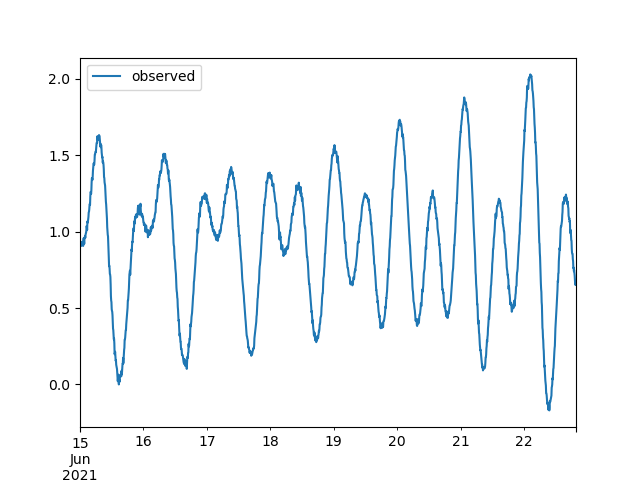

<AxesSubplot:xlabel='datetime'>

In [25]:
# When you run this cell, it should generate a plot if you follow my previous steps.
dataframe.plot()

Da-ta! This is the observed water level plot at Santa Monica between 06/25/2020 00:00 and 07/01/2020 23:54. But the plot is not self-explanatory.. Let's add some information to it.

##### 1. Add labels and a title to the plot
The x-axis is clearly date-time, but the plot is missing the y label and the title. Try adding a y-label and a title, indicating the y-variable with datum & units and the station at which the data is collected.

<i><b>Tip 1</b></i>: One way to do it is through the <i>plot()</i> attribute. Look up the optional arguments in <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html"><i>plot()</i></a> to see what you can do!
<br>
<i><b>Tip 2</b></i>: Another way is to usin the <a href="https://matplotlib.org/3.1.1/api/axes_api.html">Axes</a> class in Matplotlib. It is a powerful handler to adjust the styling / formatting to a plot. <a href="https://matplotlib.org/3.1.1/api/axes_api.html#axis-labels-title-and-legend">Here</a> are some of the attributes that set labels and titls using Axes class.

<b>Keep in mind</b>: There are multiple ways to do the same task. So whatever works works!

<IPython.core.display.Javascript object>


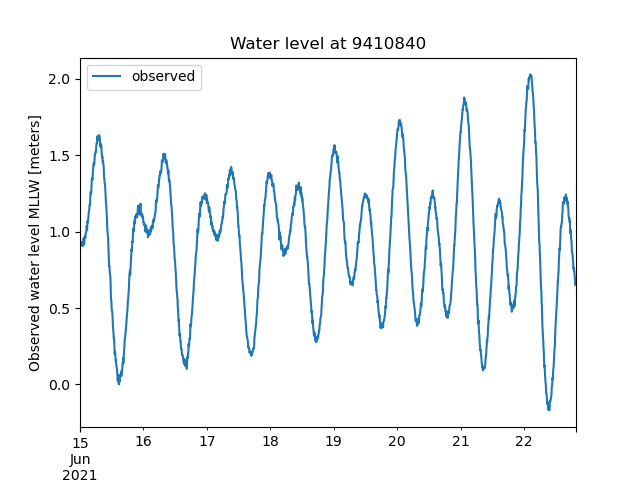

Text(0.5, 1.0, 'Water level at 9410840')

In [26]:
axis = dataframe.plot ()
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

Much better! Now, let's focus on the x-axis next.

##### 2. Re-set tick labels on the x-axis
By default, matplotlib tries to be smart and figures out the best tick locations on the x-axis for you. Here, the default ticks are located at 00:00. But what if we want every 12:00? Let's see if you can define the tick locations yourselves at 12:00.

<br>
<i><b>Tip 1</b></i>: As you move on from one quest to another, I would suggest copying your previous answer first and modify that to answer this quest. 
<br>
<i><b>Tip 2</b></i>: Terminology - Tick labels on the x-axis refers to the date times on the plot, and ticks refers to the little line above the tick labels.
<br>
<i><b>Tip 3</b></i>: If you use the Axes class, <a href="https://matplotlib.org/3.1.1/api/axes_api.html#ticks-and-tick-labels">here</a> are some of the attributes that handle ticks and tick labels.

<IPython.core.display.Javascript object>


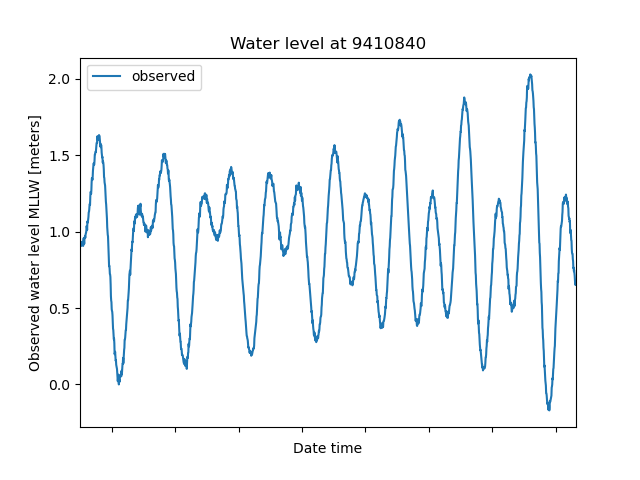

In [27]:
axis = dataframe.plot ()
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks
axis.set_xticks([],minor=True)

## Find the 12:00 index and set it as x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

##### 3. Modify the date-time in the x-axis

Even though the ticks look right, the tick labels need some work. Let's see if you can re-format it to be something like e.g. <i>06-25 12:00</i>?

<i><b>Tip 1</b></i>: Terminology - Tick labels on the x-axis refers to the date times, and ticks refers to the little line above the tick labels. 
<br>
<i><b>Tip 2</b></i>: If you use the Axes class, <a href="https://matplotlib.org/3.1.1/api/axes_api.html#ticks-and-tick-labels">here</a> are some of the attributes that handle ticks and tick labels.
<br>
<i><b>Tip 3</b></i>: Try different date-time format. For more information, visit <a href="https://strftime.org/">strftime.org</a>.

<IPython.core.display.Javascript object>


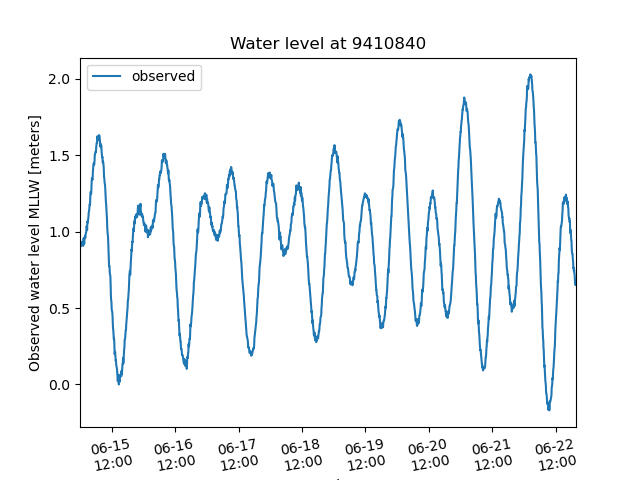

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [28]:
axis = dataframe.plot ()
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

Cool! The x-axis looks pretty good now. But it is still kinda hard to read y-value at a given time. Let's add some grid lines to the plot.

##### 4. Add grid lines to the plot
Grid lines are just a set of horizontal and vertical lines. By default, Matplotlib draws those lines at the x and y tick values. 

<i><b>Tip 1</b></i>: If you use the Axes class, you can find the attributes that adjust the appearance of your plot <a href="https://matplotlib.org/3.1.1/api/axes_api.html#appearance">here</a>.
<br>
<i><b>Tip 2</b></i>: If you customize x-ticks in the previous steps, you should see vertical grid lines at the tick values you defined.

<IPython.core.display.Javascript object>


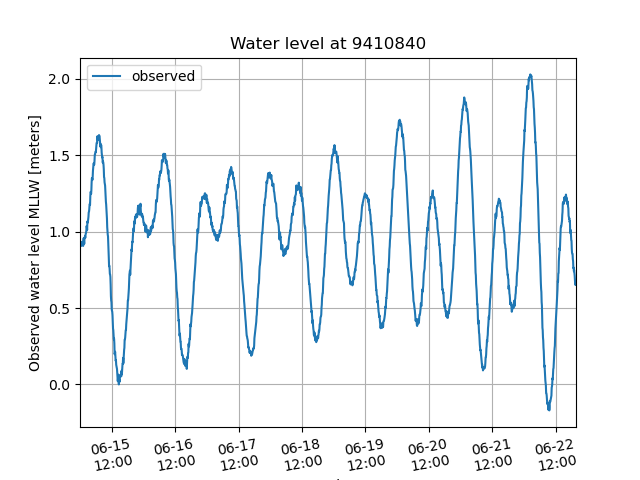

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [29]:
axis = dataframe.plot (grid=True)
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

This plot looks much more professional now! But for some picky people, this plot may look a bit squash-ish. Do you think you can make the plot a little wider?

##### 5. Adjust the size of the figure
Adjusting the figure size is needed at times, especially with a looooong time-series. When writing python script (i.e. not Jupyter notebook), Matplotlib has a default size of 10 (L) x 8 (H) inches. Let's see if you can make a rectangular plot e.g. 10 x 4?

<i><b>Tip 1</b></i>: One useful parameter for adjusting figure size is <i>figsize</i>. Look up the optional arguments in <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html"><i>plot()</i></a> to see what you can do!


<IPython.core.display.Javascript object>


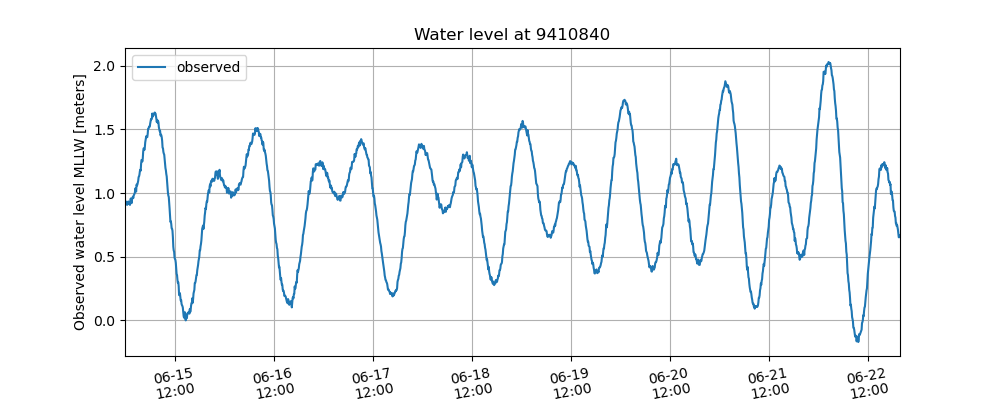

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [30]:
axis = dataframe.plot (figsize=(10, 4), grid=True)
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

Next, let's say, I am really interested in the water level at 6-28 00:00. Do you mind drawing a vertical line at that time step?

#### 6. Add a vertical line 
This is quite a common feature to do on plots. For example, What is the water level right now? All you would do is to figure out the time now and add a line to that time.

<i><b>Tip 1</b></i>: This time, you probably want to use the Axes class because you are adding new features to the plot (and not simply adjusting existing features). Make sure you get the axis instance first (see my comment in Quest 1).
<br>
<i><b>Tip 2</b></i>: Check out the spans you can do with Axes in <a href="https://matplotlib.org/3.1.1/api/axes_api.html#ticks-and-tick-labels">here</a>.
<br>
<i><b>Tip 3</b></i>: Make sure your vertical line is distinguishable from the time-series using color, linewidth, linestyle, etc.

<IPython.core.display.Javascript object>


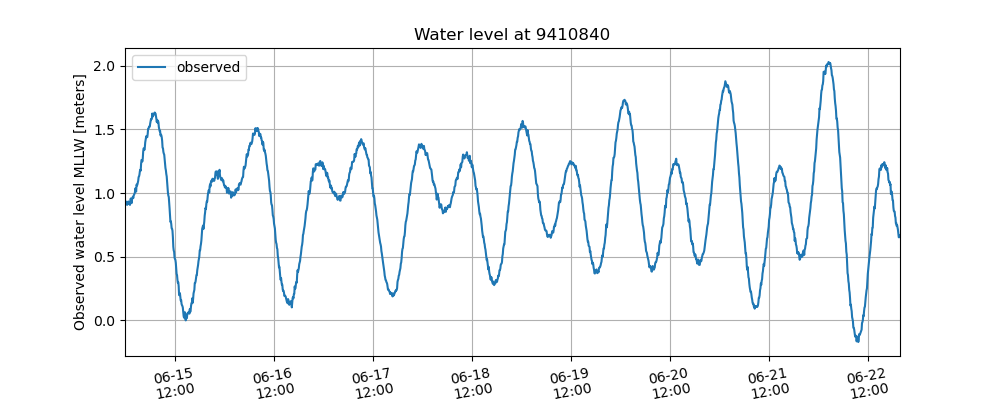

In [31]:
axis = dataframe.plot (figsize=(10, 4), grid=True)
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

## Add a vertical line 
axis.axvline (x=pandas.to_datetime ('2020-06-28 00:00'), color='red', linewidth=2.0, alpha=0.7, linestyle='--')

This is looking great - I know you can do it :) Now, you can choose to go to the next section to include prediction data. But for those curious, adventurous challengers, I have some more quests for you!  

###### 7. (Bonus) Zoom in to specific time range
Often, we are interested in a sub-range of time-series. Of course, you can always use the interactive zoom-in features in Juypter, but you can't always rely on Jupyter. So, this quest requires you to create a static plot within a specific time window.

For example, I want to study the time series between 2020-06-27 19:26 and 2020-06-28 06:22, what would you do without clicking the interact buttons in Juyptor?

<i><b>Tip 1</b></i>: Before plotting, you probably want to define a sub-dataframe that you are interested first. If you are new to pandas.DataFrame, <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html">here</a> is an official tutorial on indexing and selecting data.
<br>
<i><b>Tip 2</b></i>: With a shorter time window, make sure you adjust the x ticks and xtick labels! For example, we can do x-ticks at every hour XX:00.

<IPython.core.display.Javascript object>


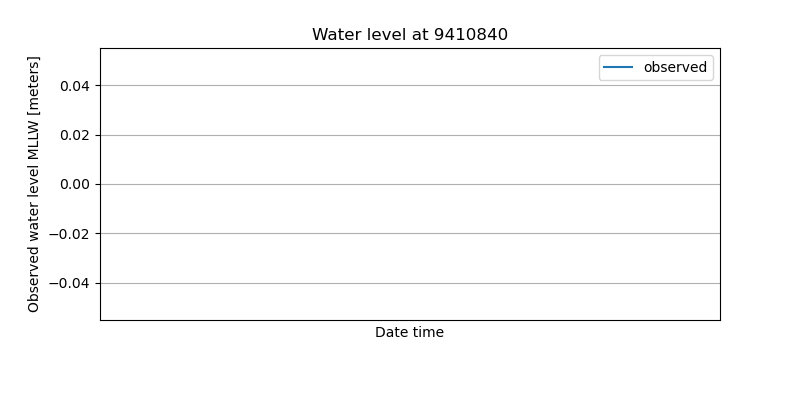

[]

In [32]:
start, end = '2020-06-27 19:26', '2020-06-28 06:22'
subframe = dataframe.loc[start:end,:]

axis = subframe.plot (figsize=(8, 4), grid=True)
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks at XX:00
is00 = subframe.index.minute == 0
xticks = subframe.index[numpy.where(is00)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

This line looks pretty bumpy because the data is actually a 6-minute time series i.e. discrete points! Can you show the individual points instead of a line?

###### 8. (Bonus) Switch from plotting a line to a scatter plot
A line going through discrete points can sometimes be deceiving. Instead of a line, let's try presenting the data in scattered points.

<i><b>Tip 1</b></i>: Again, one way to do it is through the <i>plot()</i> attribute. Look up the optional arguments in <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html"><i>plot()</i></a> to see what you can do!
<br>
<i><b>Tip 2</b></i>: Another way is to usin the <a href="https://matplotlib.org/3.1.1/api/axes_api.html">Axes</a> class. It has some <a href="https://matplotlib.org/3.1.1/api/axes_api.html#plotting">basic plotting attributes</a> for the different kind of plots.

<IPython.core.display.Javascript object>


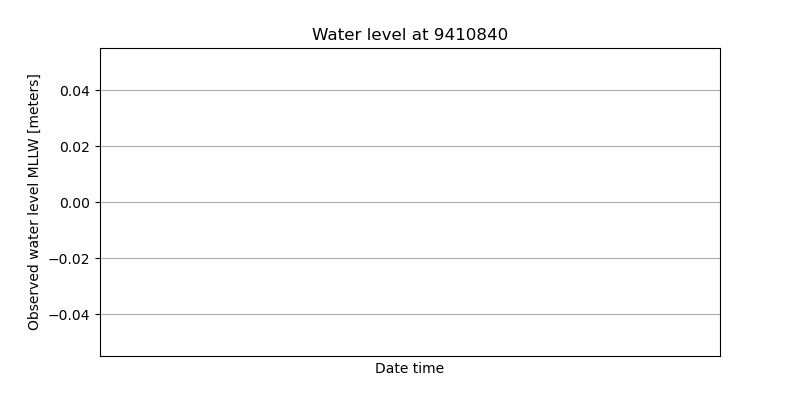

[]

In [33]:
from copy import deepcopy

subframe = deepcopy (dataframe.loc[start:end,:])
subframe['datetime'] = subframe.index

axis = subframe.plot (kind='scatter', figsize=(8, 4), grid=True, x='datetime', y='observed')
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks at XX:00
is00 = subframe.index.minute == 0
xticks = subframe.index[numpy.where(is00)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

You are AMAZING, completing all the quests!! I knew you can do it, and I hope you learned something new today. If you are bored this whole time, I challege you to step up to the next new level!

### Plot 6-minute observation & prediction data
In addition to the observed data, we will now include the predicted water levels. We would like to ..
1. download 6-minute predictions from API via requests 
2. massage the data into a workable format and merge it to the main dataframe via pandas
3. <b>PLOT</b> via matplotlib

#### Download prediction data from the API
This time, we need to download the 6-minute prediction water level time-series at Santa Monica 9410840. Please focus on predictions within the same time window i.e. between 2020/06/25 and 2020/07/01 at GMT. For comparison purposes, we would like to stick with the same datum MLLW using Metric as units. If you follow my settings, you should again find 1680 predicted data points like before.
<br><br>
<i><b>Tip 1</b></i>: Don't be shy to use the amazing <a href="https://tidesandcurrents.noaa.gov/api-helper/url-generator.html">API Builder</a> that Jia developed!!
<br>
<i><b>Tip 2</b></i>: If you forget about the requests package, go back to <a href="https://docs.google.com/presentation/d/1YxQcfctd_5P_o39EIqiqq5cYIqIzkP4c2ZUqZnfUCwQ/edit">Shawn's talk</a> last week. Remember, error handling is important!
<br>
<i><b>Tip 3</b></i>: Between XML and JSON, python works best with JSON. But it is your choice if you want to challenge yourself.
<br>
<i><b>Tip 4</b></i>: If you are really stuck, feel free to uncomment and run my codes below. 

In [34]:
## If you are really stuck, feel free to run the following lines to move on. 
content = myUtils.pull_pred (station, begin_date, end_date)

#### Massage and merge prediction data into the main dataframe
Next, you will again convert the prediction data you just downloaded into a nice Pandas time-series data frame object. Here, I would like you to merge this prediction time-series into your previously-defined <i>dataframe</i>. It means that <i>dataframe</i> has a <b>datetime</b> index and 2 columns: the <b>observed</b> column with the observed water level data and the <b>predicted</b> for the predictions. To be specific, this is what you should get when printing the <i>dataframe</i> variable.

<table>
  <tr>
    <th></th>
    <th>observed</th>
    <th>predicted</th>      
  </tr>
  <tr>
    <td><b>datetime</b></td>
    <td></td>
    <td></td> 
  </tr>
  <tr>
    <td>2020-06-25 00:00:00</td>
    <td>0.862</td>
    <td>0.832</td>      
  </tr>
  <tr>
    <td>2020-06-25 00:06:00</td>
    <td>0.836</td>
    <td>0.826</td>      
  </tr>
  <tr>
    <td>2020-06-25 00:12:00</td>
    <td>0.826</td>
    <td>0.820</td>      
  </tr>    
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>      
  </tr>        
</table>

<br>
<i><b>Tip 1</b></i>: The JSON structure for water level observations is slightly different than that for predctions. Make sure you look into the API before copying codes and assuming it would work.
<br>
<i><b>Tip 2</b></i>: One way to do it is to add a new column to your existing <i>dataframe</i>. Make sure you check the size of the prediction data before doing so - it should be the same as that of <i>dataframe</i>. 
<br>
<i><b>Tip 3</b></i>: Another way to do it is to create a new dataframe with only prediction data and then merge it to the existing <i>dataframe</i>. If you are new to Pandas.DataFrame, <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html">here</a> is the official tutorial on merging.

In [35]:
## If you are really stuck, feel free to run the following line to move on. 
pred_df = myUtils.massage_data (content, doPred=True)
dataframe = dataframe.merge (pred_df, how='outer', left_index=True, right_index=True)
dataframe

,observed,predicted
datetime,,
2021-06-15 00:00:00,0.925,0.912
2021-06-15 00:06:00,0.936,0.908
2021-06-15 00:12:00,0.934,0.904
2021-06-15 00:18:00,0.930,0.901
2021-06-15 00:24:00,0.924,0.898
...,...,...
2021-06-22 23:30:00,NaN,1.153
2021-06-22 23:36:00,NaN,1.190
2021-06-22 23:42:00,NaN,1.227


#### PLOT !
Again, you will be asked to style / format the plot one-step-at-a-time. If you are stuck at one step, feel free to move on and come back to it later!

To make it more challenging, I will give you less tips this time around. If you are stuck, feel free to look at my answer or contant me (Elim Thompson) directly!

##### 1. Plot both observed and predict time-series on the same plot
Make sure you ..
- Add the x & y labels and a title to the plot
- Modify the date-time in the x-axis
- Re-set tick labels on the x-axis to be 12:00
- Add grid lines to the plot
- Adjust the size of the figure for a wider plot

<br>
<i><b>Tip 1</b></i>: Depending on how you coded in the previous section, you may be able to copy and paste your answer before.

<IPython.core.display.Javascript object>


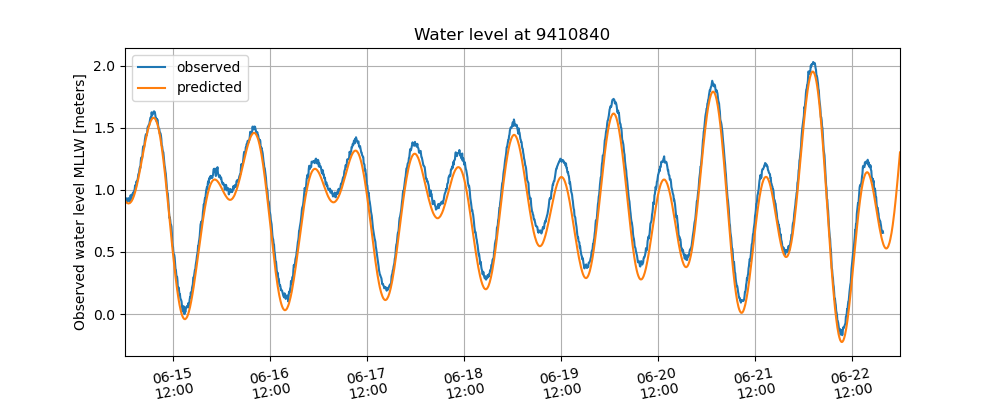

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [36]:
axis = dataframe.plot (figsize=(10, 4), grid=True)
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

##### 2. Change line styles
With 2 pieces of information, the two lines may overlap with each other. Can you help me change the line style to distinguish one from another? For example, the observed data can be represented as a solid line, and the predicted data can be a dashed line.

<br>
<i><b>Tip 1</b></i>: Line style is adjusted by the <i>linestyle</i> argument (sometimes a.k.a. <i>ls</i>). Check <a href="https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html">here</a> for the available line styles in matplotlib.
<br>
<i><b>Tip 2</b></i>: In addition to <i>linestyle</i>, you can also try <i>linewidth</i> (sometimes a.k.a. <i>lw</i>) to adjust the width of a line.

<IPython.core.display.Javascript object>


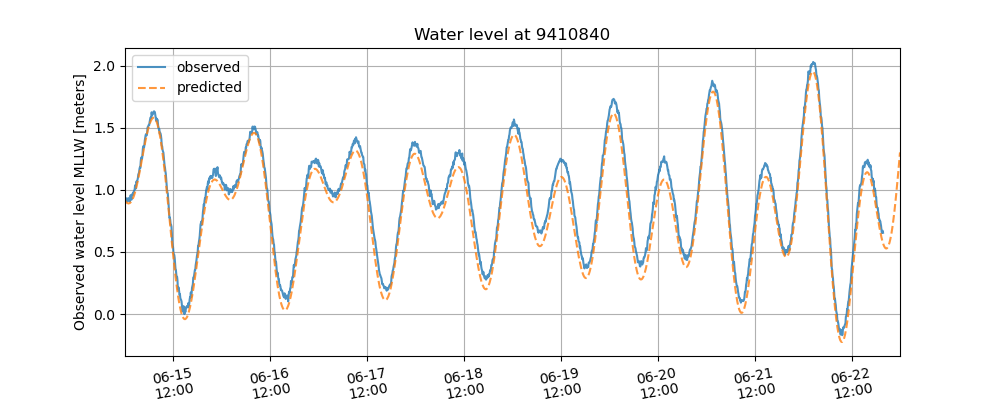

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [37]:
axis = dataframe.plot (figsize=(10, 4), grid=True, alpha=0.8, style=['-', '--'])
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

Changing the line style & width may not always help. Let's should try changing the colors?

##### 3. Change the colors
You can choose the colors to be your favorite for this quest.

<br>
<i><b>Tip 1</b></i>: Color is adjusted by the <i>color</i> argument. Check <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colors.html">here</a> for the simple color options in matplotlib. For a palatable, please visit this <a href="https://matplotlib.org/3.1.0/gallery/color/named_colors.html">list of named colors</a>. You can also replace the name by a Color-hex code.
<br>
<i><b>Tip 2</b></i>: In addition to <i>color</i>, you can also try <i>alpha</i> to adjust the transparency of a line (or any kind of plot).
<br>
<i><b>Tip 3</b></i>: When plotting multiple information in a graph, one should always think of color-blindness. <a href="https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3">Here</a> is one of the best resources I have found for picking colors. 

<IPython.core.display.Javascript object>


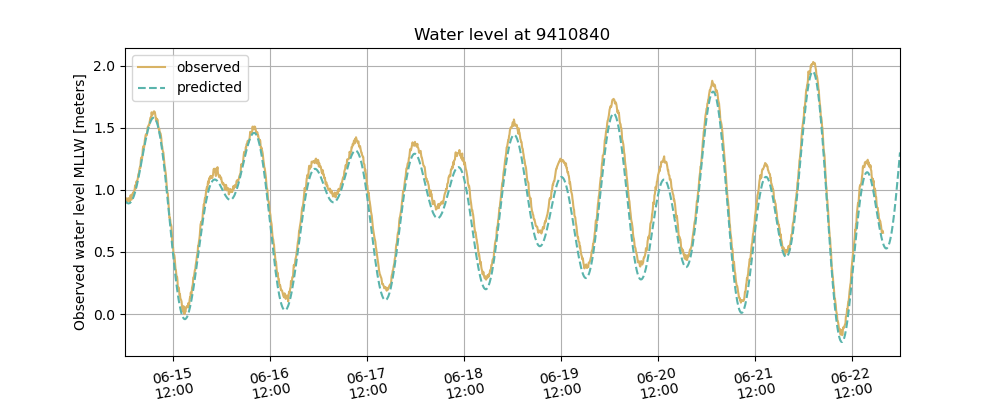

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [38]:
axis = dataframe.plot (figsize=(10, 4), grid=True, style=['-', '--'], color=['#d8b365', '#5ab4ac'])
axis.set_xlabel ("Date time")
axis.set_ylabel ("Observed water level MLLW [meters]")
axis.set_title ('Water level at ' + station)

## Remove the default x ticks and tick labels
axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

## Set x ticks
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

## Set x tick labels
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

Sometimes, the colors may not help either... But at least you know how to play around with colors and linestyles :)

##### 4. What about residuals?
In the last 3 quests, we will explore the different ways to plot 3 data on the same plot - observed data, predicted data, and the residual. 

Before plotting the residuals, let us create a new column in the <i>dataframe</i> called <b>residual</b>. Here, residuals are defined as (observed - predicted). 

In [39]:
# Add a new column 'residual' to dataframe 
#   residual = observed - predicted
dataframe['residual'] = dataframe.observed - dataframe.predicted

###### 4a. Plot 3 data in 3 plots 
As the first step, I would like you to try plotting them in 3 different sub-plots. The top plot is observed data, the middle plot is the predicted, and the bottom plot is the residual.

<br>
<i><b>Tip 1</b></i>: The simpliest way here is to use the <i>plot()</i> attribute. Look up the optional arguments in <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html"><i>plot()</i></a> to see if you can generate a sub-plot!
<br>
<i><b>Tip 2</b></i>: In matplotlib, there are infinite ways to generate multiple plots e.g. `axes.SubplotBase`, `plt.subplot`, etc. My favorite is <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html">GridSpec</a>. Although it is complicated, GridSpec is the most flexible class from which you can generate any kind of multiple plots.
<br>
<i><b>Tip 2</b></i>: Make sure the x-axis align among the 3 plots!

<IPython.core.display.Javascript object>


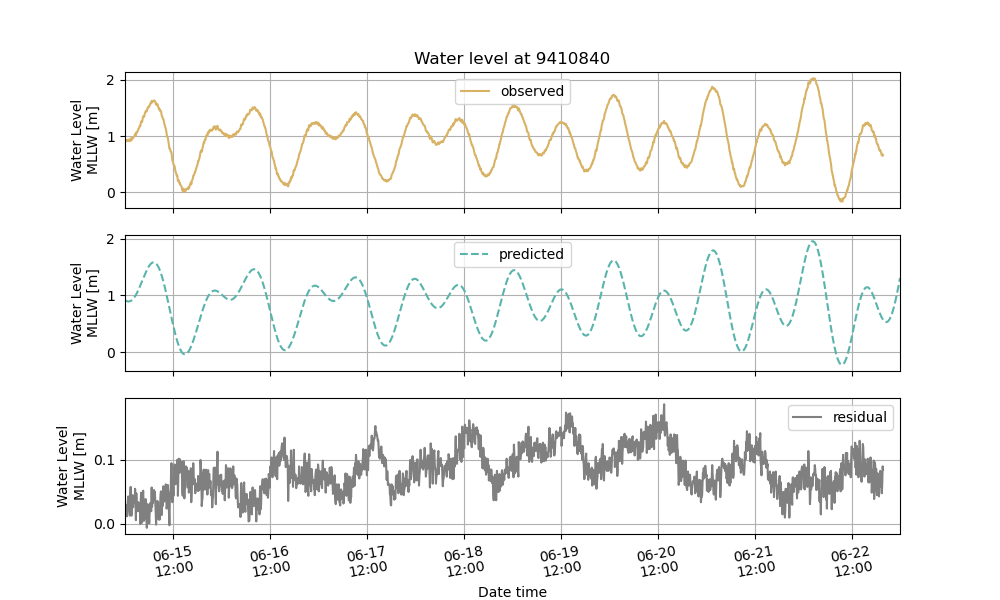

Text(0.5, 0, 'Date time')

In [40]:
axes = dataframe.plot (subplots=True, figsize=(10, 6), grid=True, style=['-', '--'], color=['#d8b365', '#5ab4ac', 'gray'])

axes[0].set_title ('Water level at ' + station)
is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]

for axis in axes:
    axis.set_ylabel ("Water Level\nMLLW [m]")

    ## Remove the default x ticks and tick labels
    axis.set_xticks([],minor=True)
    axis.set_xticklabels([],minor=True)

    ## Set x ticks
    axis.set_xticks (xticks)
    
## Set x tick labels
axes[-1].set_xticklabels (xticklabels, rotation=10)
axes[-1].set_xlabel ("Date time")

###### 4b. Plot  3 data in 2 plots
Plotting 3 plots separately is kind of redundant here because observed and predicted data are very similar. So, I usually prefer plotting the two time-series together, while the residual is plotted separately.

Here, I would like to ask you to have two sub-plots. The top plot should include both observed and predicted time-series, whereas the bottom plot only includes the residual.

<br>
<i><b>Tip 1</b></i>: Re-visit the tips in Quest 4a above :)

<IPython.core.display.Javascript object>


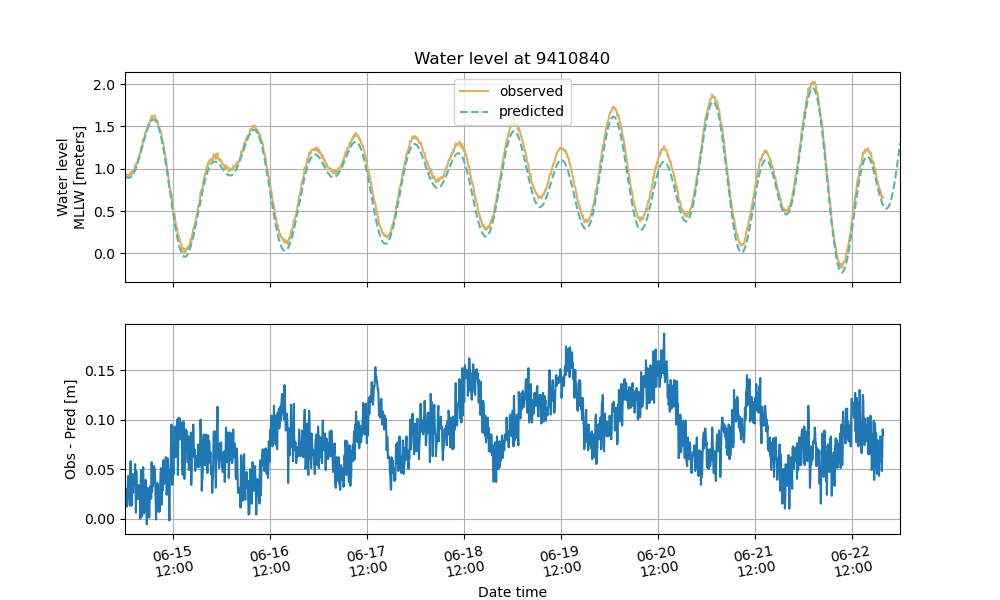

[Text(27062640, 0, '06-15\n12:00'),
 Text(27064080, 0, '06-16\n12:00'),
 Text(27065520, 0, '06-17\n12:00'),
 Text(27066960, 0, '06-18\n12:00'),
 Text(27068400, 0, '06-19\n12:00'),
 Text(27069840, 0, '06-20\n12:00'),
 Text(27071280, 0, '06-21\n12:00'),
 Text(27072720, 0, '06-22\n12:00')]

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

## Top Plot: Time-series
subframe = dataframe.drop (axis=1, columns=['residual'])
axis = subframe.plot (ax=axes[0], grid=True, style=['-', '--'], color=['#d8b365', '#5ab4ac'])

axis.set_xlabel ("")
axis.set_ylabel ("Water level\nMLLW [meters]")
axis.set_title ('Water level at ' + station)

axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)
    
## Bottom Plot: Residual
axis = dataframe.residual.plot (ax=axes[1], grid=True)
axis.set_ylabel ("Obs - Pred [m]")
axis.set_xlabel ("Date time")

axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)

###### 4c. Plot 3 data in 1 plots
It is also possible to plot all three data in the same plot with dual y-axes! 

Here, I would like to ask you to have 1 plot with 2 y-axis. Observed and Predicted time-series should be read from the left y-axis, whereas the residual should be read from the right axis.

<br>
<i><b>Tip 1</b></i>: The simpliest way here is to use the <i>plot()</i> attribute. Look up the optional arguments in <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html"><i>plot()</i></a> to see if you can generate a plot with a secondary y-axis on the right!
<br>
<i><b>Tip 2</b></i>: In matplotlib, one common way to do dual axis is `plt.subplot`. See <a href="https://matplotlib.org/gallery/api/two_scales.html">here</a> for example.


<IPython.core.display.Javascript object>


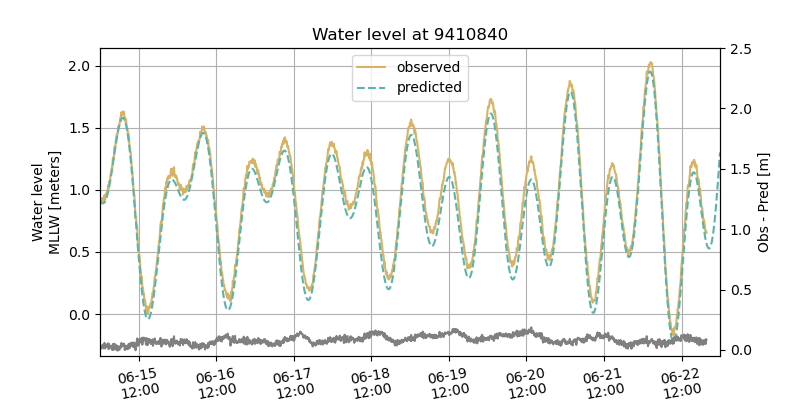

(-0.05, 2.5)

In [42]:
axis = dataframe.plot (figsize=(8, 4), secondary_y=['residual'], grid=True,
                       style=['-', '--', '-'], color=['#d8b365', '#5ab4ac', 'gray'])

axis.set_xlabel ("Date time")
axis.set_ylabel ("Water level\nMLLW [meters]")
axis.set_title ('Water level at ' + station)

axis.set_xticks([],minor=True)
axis.set_xticklabels([],minor=True)

is1200 = numpy.logical_and (dataframe.index.hour == 12, dataframe.index.minute == 0)
xticks = dataframe.index[numpy.where(is1200)]
axis.set_xticks (xticks)

xticklabels = [dt.strftime ('%m-%d\n%H:%M') for dt in xticks]
axis.set_xticklabels (xticklabels, rotation=10)
axis.legend (loc='upper center')

axis.right_ax.set_ylabel ('Obs - Pred [m]')
axis.right_ax.set_ylim (-0.05, 2.5)

Congratulations! You have completed the challenge!

Matplotlib is a very useful plotting tool with a lot of flexibility. We haven't touched upon some of the amazing features. In fact, I generated all the plots in <a href="https://arxiv.org/pdf/1901.05366.pdf">my publication</a> using matplotlib alone (see <a href="https://github.com/elim723/nutau_plotter">my repo</a> if interested). For more examples, please visit the <a href="https://matplotlib.org/">official site</a>.

If you are doing statistical analyses, you can also check out the <a href="https://seaborn.pydata.org/introduction.html">seaborn</a> package. It is built on Matplotlib and simplifies a lot of steps when plotting data from dataframe. This package is extremely useful when doing AI / ML projects that study relationships among variables!

I hope you have learned something new today. Please let me know if you figure out other cool ways to do the same tasks :)